In [1]:
# Import standard libraries
import os
import sys
import itertools

In [2]:
# Import libraries to manage arrays, plotting, and Flash-X datasets
import numpy
import matplotlib.pyplot as pyplot
import boxkit

In [3]:
PROJECT_HOME="/home/akash/jobs/boiling-simulations/simulation/PoolBoiling/SingleBubble"

In [4]:
datasetLoc = {
    r"Buffer = 0.5" : PROJECT_HOME + os.sep + "jobnode.archive/buffer_0.5_long",
}

fileNumList = [*range(1,401)]

datasetDict = {}
for dsetKey in datasetLoc.keys():
    datasetList = []
    for fileNum in fileNumList:
        dataset = boxkit.read_dataset(datasetLoc[dsetKey] 
                                      + os.sep 
                                      + "INS_Pool_Boiling_hdf5_plt_cnt_"
                                      + str(fileNum).zfill(4), source="flash")
        datasetList.append(boxkit.mergeblocks(dataset, ["temp", "dfun"]))
    datasetDict[dsetKey]=datasetList

In [47]:
heatFluxDict = {}
for dsetKey in datasetDict.keys():
    heatFluxList = []
    for dset in datasetDict[dsetKey]:
        for block in dset.blocklist:
            #mean_hf = numpy.mean(((1 - block["temp"][0,0,:])/block.dy)*(block["dfun"][0,0,:]<0))
            #mean_phi = numpy.mean((block["dfun"][0,0,:]<0))
            #heatFluxList.append(mean_hf/mean_phi)
            mean_hf = numpy.mean((1 - block["temp"][0,0,:])/block.dy)
            heatFluxList.append(mean_hf)
    heatFluxDict[dsetKey] = heatFluxList

(3.5, 5.0)

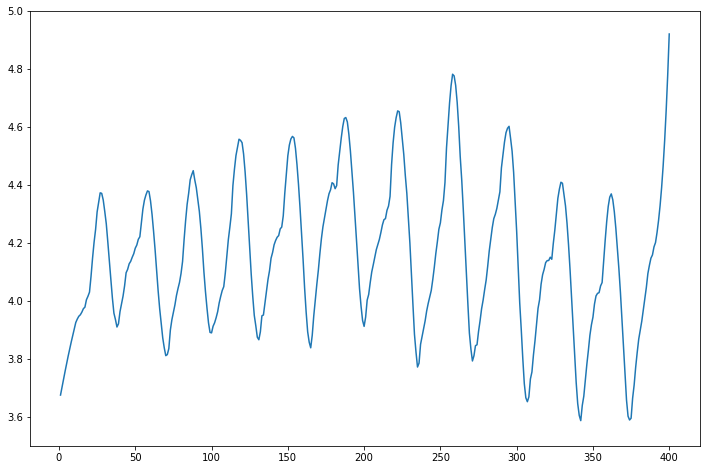

In [60]:
from scipy import signal
pyplot.figure(figsize=(12,8))
#pyplot.plot(fileNumList, heatFluxDict["Buffer = 0.5"])
pyplot.plot(fileNumList, signal.savgol_filter(heatFluxDict["Buffer = 0.5"],20,3))
pyplot.ylim([3.5,5])